## Project - Stats Hands On

#### Data Description:

###### Context:

Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

#### Attribute Information:

###### age: age of primary beneficiary

###### sex: insurance contractor gender, female, male

###### bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

###### children: Number of children covered by health insurance / Number of dependents

###### smoker: Smoking

###### region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

###### charges: Individual medical costs billed by health insurance.

#### Learning Outcomes:

     Exploratory Data Analysis
     Practicing statistics using Python
     Hypothesis testing

#### Objective:

###### We want to see if we can dive deep into this data to find some valuable insights.

##### Steps and tasks:

- Import the necessary libraries (2 marks)
- Read the data as a data frame (2 marks)
- Perform basic EDA which should include the following and print out your insights at every step. (28 marks)

a. Shape of the data (2 marks)

b. Data type of each attribute (2 marks)

c. Checking the presence of missing values (3 marks)

d. 5 point summary of numerical attributes (3 marks)

e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. (4 marks)

f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns (2 marks)

g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns (4 marks)

h. Distribution of categorical columns (include children) (4 marks)

i. Pair plot that includes all the columns of the data frame (4 marks) 4. Answer the following questions with statistical evidence (28 marks)

a. Do charges of people who smoke differ significantly from the people who don't? (7 marks)

b. Does bmi of males differ significantly from that of females? (7 marks)

c. Is the proportion of smokers significantly different in different genders? (7

marks)

d. Is the distribution of bmi across women with no children, one child and two children, the same? (7 marks)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, stats
from math import sqrt
from numpy import mean, var

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


#### a. Shape of the data

In [4]:
# a. Shape of the data
data.shape

(1338, 7)

#### b. Data type of each attribute

In [5]:
# b. Data type of each attribute
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [17]:
# b. Data type of each attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### c. Checking the presence of missing values

In [6]:
# c. Checking the presence of missing values

#1. isnull() - function to find out all the fieldswhich have missing values. Will return 'True' if value is missing else False

data.isnull()

,age,sex,bmi,children,smoker,region,expenses
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [7]:
# c. Checking the presence of missing values

#2. isnull().sum() - To get how many missing values are in each column we use sum() along with isnull(). It sums up the True in each column and returns the count of missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [8]:
# c. Checking the presence of missing values

#3. Sorting in descending order the columns with missing values 

data.isnull().sum().sort_values(ascending=False)

expenses    0
region      0
smoker      0
children    0
bmi         0
sex         0
age         0
dtype: int64

In [10]:
# c. Checking the presence of missing values

#4. To get the percentage of missing values in each column ---divide by length of data frame.

data.isnull().sum().sort_values(ascending=False)/len(data)

expenses    0.0
region      0.0
smoker      0.0
children    0.0
bmi         0.0
sex         0.0
age         0.0
dtype: float64

#### d. 5 point summary of numerical attributes

In [11]:
# d. 5 point summary of numerical attributes

#1 . describe method
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [18]:
# d. 5 point summary of numerical attributes

#2 . using statistics module

import statistics
print("Mean of Age:",statistics.mean(data['age']))
print("Quantiles of Age: ",statistics.quantiles(data['age'],n=4))


Mean of Age: 39.20702541106129
Quantiles of Age:  [26.75, 39.0, 51.0]


In [23]:
# d. 5 point summary of numerical attributes

from numpy import percentile
newdata = data.loc[:,['age','bmi','children','expenses']]
print(newdata.head())
print("Quartiles",percentile(newdata,[25,50,75]))
print("**********************")
print("Min value:",newdata.min())
print("**********************")
print("Max value:",newdata.max())

   age   bmi  children  expenses
0   19  27.9         0  16884.92
1   18  33.8         1   1725.55
2   28  33.0         3   4449.46
3   33  22.7         0  21984.47
4   32  28.9         0   3866.86
Quartiles [ 13.25    32.5    328.4675]
**********************
Min value: age           18.00
bmi           16.00
children       0.00
expenses    1121.87
dtype: float64
**********************
Max value: age            64.00
bmi            53.10
children        5.00
expenses    63770.43
dtype: float64


#### e. Distribution of ‘bmi’, ‘age’ and ‘expenses’ columns.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'expenses'}>, <AxesSubplot:>]],
      dtype=object)

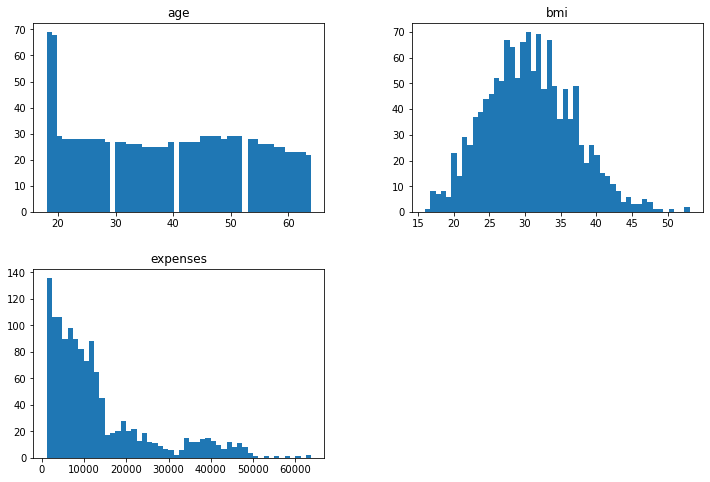

In [31]:
# e. Distribution of ‘bmi’, ‘age’ and ‘expenses’ columns.

#1. Using Dataframe - histplot  ---- hist method requires numerical columns

# A histogram shows the number of occurrences of different values in a dataset. 
# It is similar to bar chart but the difference is: the unique values will be grouped into ranges. 
# These ranges are called bins or buckets
# In Python, the default number of bins is 10

newDistData = data.loc[:,['age','bmi','expenses']]
newDistData.hist(bins=50,grid=False,figsize = (12,8))


Text(0.5, 1.0, 'Distribution of Age')

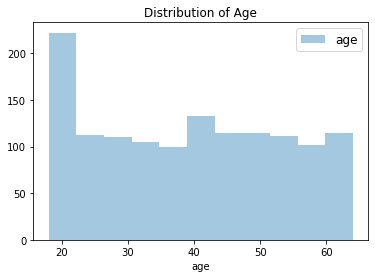

In [44]:
# e. Distribution of ‘bmi’, ‘age’ and ‘expenses’ columns.

# 2. Using seaborn
# Seaborn’s distplot can take the column from Pandas dataframe as argument to make histogram
# Seaborn can infer the x-axis label and its ranges. 
# It automatically chooses a bin size to make the histogram. 
# Seaborn plots density curve in addition to a histogram
# We can use Seaborn distplot’s argument ‘kde=False’ to remove the density line on the histogram
# ‘color=’red’ argument to change the color of the histogram
# use bins=100 to increase the number of bins


sns.distplot(newDistData['age'],  kde=False, label='age')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Distribution of Age')



Text(0.5, 1.0, 'Distribution of BMI')

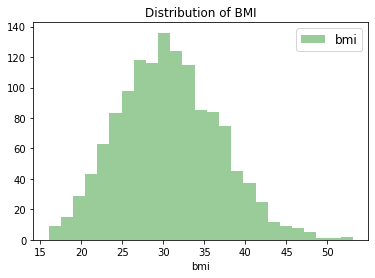

In [46]:
sns.distplot(newDistData['bmi'],  kde=False, label='bmi',color='green')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Distribution of BMI')


Text(0.5, 1.0, 'Distribution of Expenses')

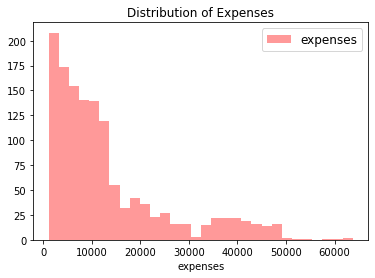

In [45]:

sns.distplot(newDistData['expenses'],  kde=False, label='expenses',color='red')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Distribution of Expenses')

#### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [50]:
for column in newDistData:
    print(f"Skew of {column}",skew(newDistData[column]))


Skew of age 0.055610083072599126
Skew of bmi 0.284273810356019
Skew of expenses 1.5141797167430497


In [51]:
 newDistData.skew()

age         0.055673
bmi         0.284593
expenses    1.515880
dtype: float64

#### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

<AxesSubplot:>

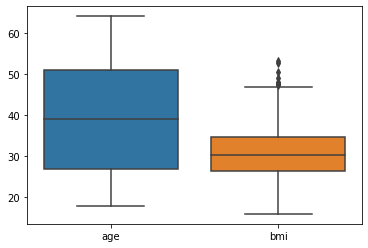

In [54]:
# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

# 1. using boxplot
new_data1 = newDistData.loc[:,['age','bmi']]
sns.boxplot(data = new_data1)

BMI,Expenses have outliers

<AxesSubplot:>

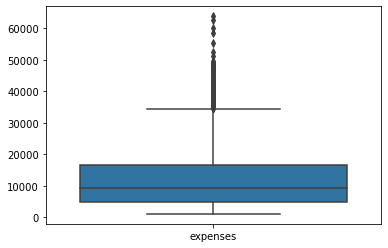

In [71]:
sns.boxplot(data = newDistData.loc[:,['expenses']])

In [59]:
# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘expenses' columns

# 1. using z-score
       # - calculate the zscore for each value in the df
       # - if zscore(value) < -3 or zscore(value) > 3 then the value is an outlier

from scipy import stats

# calculate the absolute z-score for the data
zscore = np.abs(stats.zscore(newDistData))

threshold = 3

np.where(zscore > 3) ### returns two arrays. 1st array is row number and 2nd array is the column number

### arr1[0]= 34 arr2[0]=2 so the zscore of  row 34, column 2 is greater thn 3--> it is an outlier

### The numpy.where() function returns the indices of elements in an input array where the given condition is satisfied

 

(array([  34,  116,  543,  577,  819,  847, 1047, 1146, 1230, 1300, 1317],
       dtype=int64),
 array([2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1], dtype=int64))

In [61]:
### removal of outliers
DistData_without_outlier = newDistData[(zscore < 3).all(axis=1)]

#The all() function is used to check whether ALL elements are True, potentially over an axis

,age,bmi,expenses
0,19,27.9,16884.92
1,18,33.8,1725.55
2,28,33.0,4449.46
3,33,22.7,21984.47
4,32,28.9,3866.86
...,...,...,...
1333,50,31.0,10600.55
1334,18,31.9,2205.98
1335,18,36.9,1629.83
1336,21,25.8,2007.95


In [89]:
from numpy import percentile
print(percentile(newDistData['bmi'],[0.25,0.50,0.75]))
newDistData['bmi'].quantile(0.25)

[17.23425 17.3685  17.70275]


26.3

In [155]:
# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘expenses' columns

# 1. using IQR method

#outliers lie beyond Q1-1.5(IQR) and Q3 + 1.5(IQR)

### Getting Q1 and Q2

def outlier_detection_removal(dataframe, columnName):
    Q1,Q3 = np.quantile(dataframe[columnName], 0.25), np.quantile(dataframe[columnName], 0.75)
    IQR = Q3-Q1
    print("Q1:",Q1)
    print("Q3:",Q3)
    print("IQR: ",IQR)
    # outlier cutoff
    cut_off = IQR * 1.5
    print("cut_off:",cut_off)
    #lower threshold
    l_threshold = Q1 - cut_off
    print("l_threshold:",l_threshold)
    #upper_threshold
    u_threshold = Q3 + cut_off
    print("u_threshold:",u_threshold)
    print("*******************************************************")
    
    # outliers
    outliers_above= dataframe[dataframe[columnName] > u_threshold] 
    print("Outliers above::" ,outliers_above)
    print("*******************************************************")
    outliers_below=dataframe[dataframe[columnName] < l_threshold] 
    print("Outliers below::" ,outliers_below)
    print("*******************************************************")
    print('Total number of outliers are', outliers_above.shape[0]+ outliers_below.shape[0])
    print("*******************************************************")
    
    #outlier removal
    df_new = dataframe[(dataframe[columnName] < u_threshold) & (dataframe[columnName] > l_threshold)]
    print("Data frame after removal of outliers:",df_new, sep="\n")
    print("*******************************************************")
    return(df_new)

Q1: 26.3
Q3: 34.7
IQR:  8.400000000000002
cut_off: 12.600000000000003
l_threshold: 13.699999999999998
u_threshold: 47.300000000000004
Total number of outliers are 9
      age   bmi  expenses
0      19  27.9  16884.92
1      18  33.8   1725.55
2      28  33.0   4449.46
3      33  22.7  21984.47
4      32  28.9   3866.86
...   ...   ...       ...
1333   50  31.0  10600.55
1334   18  31.9   2205.98
1335   18  36.9   1629.83
1336   21  25.8   2007.95
1337   61  29.1  29141.36

[1329 rows x 3 columns]


<AxesSubplot:>

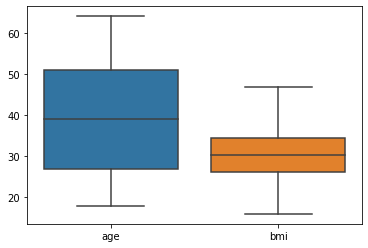

In [139]:
### removing outliers from bmi
df_outlierRemoval = outlier_detection_removal(newDistData,'bmi')

# plotting the box plot after removal of outliers from bmi
sns.boxplot(data = df_outlierRemoval[['age','bmi']])

Q1: 4738.27
Q3: 16586.5
IQR:  11848.23
cut_off: 17772.345
l_threshold: -13034.075
u_threshold: 34358.845
*******************************************************
Outliers above::       age   bmi  expenses
14     27  42.1  39611.76
19     30  35.3  36837.47
23     34  31.9  37701.88
29     31  36.3  38711.00
30     22  35.6  35585.58
...   ...   ...       ...
1300   45  30.4  62592.87
1301   62  30.9  46718.16
1303   43  27.8  37829.72
1313   19  34.7  36397.58
1323   42  40.4  43896.38

[138 rows x 3 columns]
*******************************************************
Outliers below:: Empty DataFrame
Columns: [age, bmi, expenses]
Index: []
*******************************************************
Total number of outliers are 138
*******************************************************
Data frame after removal of outliers:
      age   bmi  expenses
0      19  27.9  16884.92
1      18  33.8   1725.55
2      28  33.0   4449.46
3      33  22.7  21984.47
4      32  28.9   3866.86
...   ...   ...   

<AxesSubplot:>

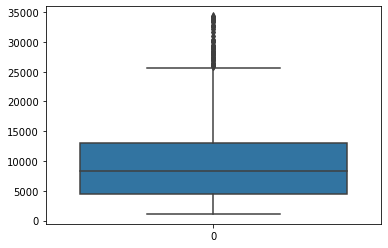

In [159]:
### removing outliers from expenses
df_outlier_expense_removed = outlier_detection_removal(df_outlierRemoval,'expenses')
print("*******************************************************")
print("Count of rows with expenses < -13034.075",(df_outlier_expense_removed['expenses'] < -13034.075).sum())
print("Count of rows with expenses > 34358.845",(df_outlier_expense_removed['expenses'] > 34358.845).sum())

print("*******************************************************")
# plotting the box plot after removal of outliers from bmi
sns.boxplot(data = df_outlier_expense_removed['expenses'])

#### h. Distribution of categorical columns

In [177]:
# copying the data
data_categorical = data.copy()

# removing the non categorical columns
data_categorical.drop(['age','bmi','expenses'],axis =1,inplace=True)
data_categorical.head()

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest


In [178]:
### count of males and females
data_categorical['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

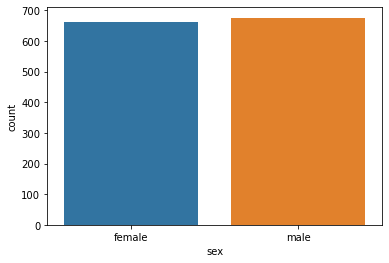

In [179]:
### Count plot
sns.countplot(x='sex',data=data_categorical)

<AxesSubplot:xlabel='count', ylabel='smoker'>

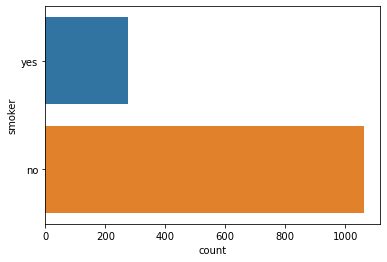

In [180]:
## Count plot for smokers
sns.countplot(y='smoker',data=data_categorical)

<AxesSubplot:xlabel='count', ylabel='region'>

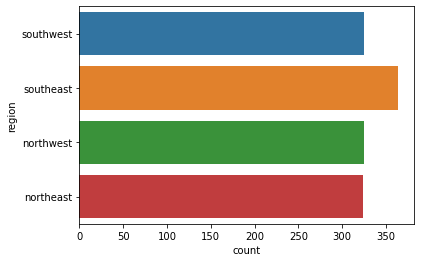

In [181]:
## Count plot for regions
sns.countplot(y='region',data=data_categorical)

<AxesSubplot:xlabel='count', ylabel='children'>

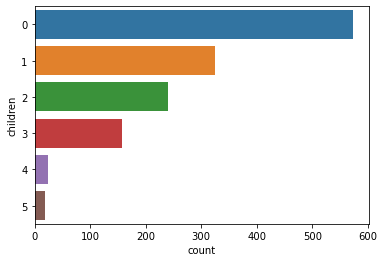

In [182]:
## Count plot for children
sns.countplot(y='children',data=data_categorical)

#### i. Pair plot that includes all the columns of the data frame

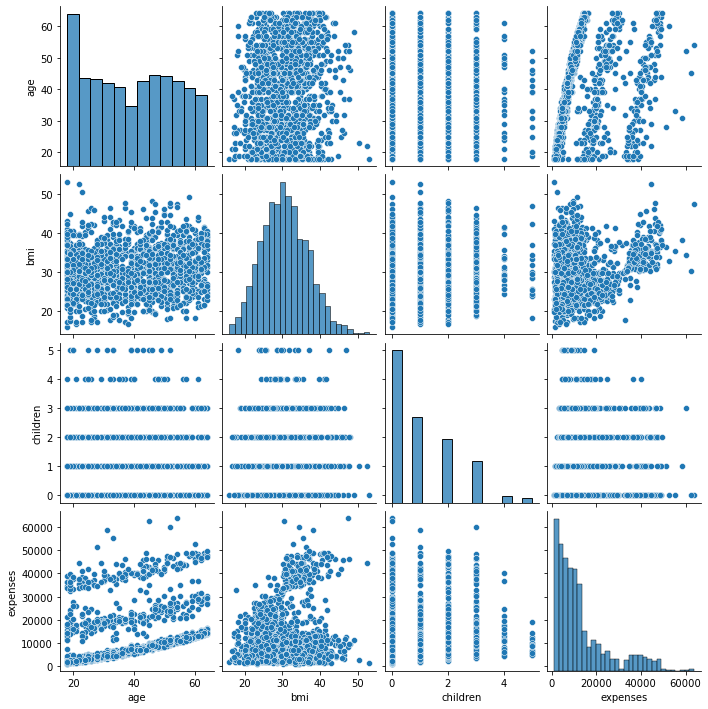

In [185]:
sns.pairplot(data = data)

#### 4. Answer the following questions with statistical evidence


 - a. Do expenses of people who smoke differ significantly from the people who don't?

 - b. Does bmi of males differ significantly from that of females? 

 - c. Is the proportion of smokers significantly different in different genders? 

 - d. Is the distribution of bmi across women with no children, one child and two children, the same? 

#### a. Do expenses of people who smoke differ significantly from the people who don't?

 - Step1: Filter data separately for smokers and non smokers
 - Step2: Plot the expenses of smokers and non-smokers

In [186]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [191]:
smokers = data[(data['smoker'] == 'yes')]
non_smokers = data[(data['smoker'] == 'no')]


,age,sex,bmi,children,smoker,region,expenses
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
...,...,...,...,...,...,...,...
1332,52,female,44.7,3,no,southwest,11411.69
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83


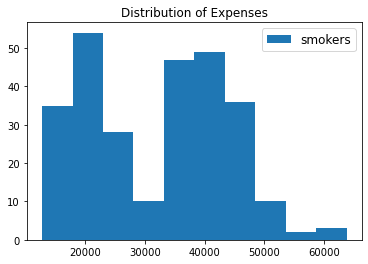

In [200]:
smokers['expenses'].hist(grid=False,label='smokers')
# non_smokers['expenses'].hist(grid=False,label='non-smokers')
plt.legend(prop={'size': 12})
plt.title('Distribution of Expenses')
plt.xlabel = 'expenses'


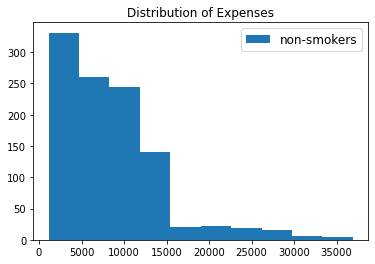

In [203]:
non_smokers['expenses'].hist(grid=False,label='non-smokers')
# non_smokers['expenses'].hist(grid=False,label='non-smokers')
plt.legend(prop={'size': 12})
plt.title('Distribution of Expenses')
plt.xlabel = 'expenses'

a.Do expenses of people who smoke differ significantly from the people who don't?

 - Null Hypothesis: Expenses of people who smoke is not significantly different from people do not smoke
 - Alternate Hypothesis: Expenses of people who smoke differ significantly from people who do not smoke
 - Assuming Confidence Interval = 95% = 0.95
 - alpha(Significance level) =0.05


In [260]:
alpha = 0.05
statistic,pvalue = stats.ttest_ind(non_smokers['expenses'], smokers['expenses'],equal_var=False)
pvalue

if pvalue < alpha:
    print(f"Reject the null hypothesis as pvalue({pvalue}) < alpha({alpha})")
    print("Conclusion: Expenses of people who smoke differ significantly from people who do not smoke")
else:
    print(f"Fail to reject the null hypothesis as pvalue({pvalue}) >= alpha({alpha})")
    print("Conclusion: Expenses of people who smoke is not significantly different from people do not smoke")

Reject the null hypothesis as pvalue(5.889487102677625e-103) < alpha(0.05)
Conclusion: Expenses of people who smoke differ significantly from people who do not smoke


#### b. Does bmi of males differ significantly from that of females?

b. Does bmi of males differ significantly from that of females?

- Null Hypothesis (H0): BMI of males does NOT differ significantly from that of females
- Alternate Hypothesis (Ha): BMI of males differ significantly from that of females.
- Assuming Confidence Interval = 95% = 0.95
- alpha(Significance level) =0.05


In [213]:
males = data[data['sex']=='male']
females = data[data['sex']=='female']

C:\Users\User1\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI of males')

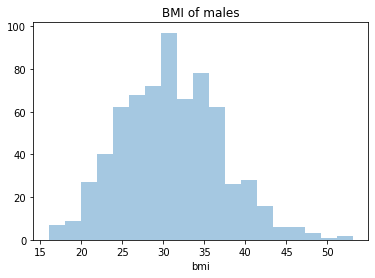

In [215]:
### Plotting the bmi for males
sns.distplot(males['bmi'],kde=False)
plt.title("BMI of males")

Text(0.5, 1.0, 'BMI of females')

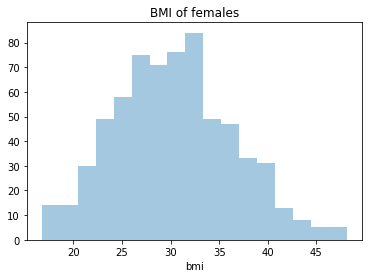

In [217]:
### Plotting the bmi for females
sns.distplot(females['bmi'],kde=False)
plt.title("BMI of females")

In [259]:
alpha=0.05

alpha = alpha
statistic,pvalue = stats.ttest_ind(males['bmi'],females['bmi'],equal_var=False)
if(pvalue < alpha):
    print("Reject the null hypothesis as pvalue({pvalue}) < aplha({alpha})")
    print("Conclusion: BMI of males differ significantly from that of females")
else:
    print(f"Fail to reject the null hypothesis as pvalue({pvalue}) >= aplha({alpha})")
    print("Conclusion: BMI of males does NOT differ significantly from that of females")
    

Fail to reject the null hypothesis as pvalue(0.08986184196319554) >= aplha(0.05)
Conclusion: BMI of males does NOT differ significantly from that of females


#### c. Is the proportion of smokers significantly different in different genders?

c. Is the proportion of smokers significantly different in different genders?

 - H0:The proportion of smokers is NOT significantly different in different genders
 - Ha:The proportion of smokers is significantly different in different genders
 - CI = 0.95
 - alpha(SL) = 0.05


In [246]:
## filtering the male and female
female_smokers = (data['sex'] == 'female') & (data['smoker'] == 'yes')
male_smokers = (data['sex'] == 'male') & (data['smoker'] == 'yes')

male = data['sex']=='male'
female = data['sex'] == 'female'

In [234]:
female_smokers.value_counts()

False    1223
True      115
dtype: int64

In [235]:
male_smokers.value_counts()

False    1179
True      159
dtype: int64

In [236]:
#proportion of smokers based on gender
#Female

115/1338 * 100

8.594917787742899

In [237]:
#Male
159/1338 * 100

11.883408071748878

<AxesSubplot:xlabel='count', ylabel='sex'>

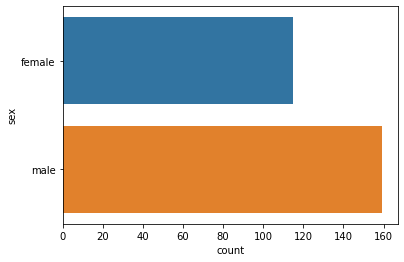

In [225]:
## plotting the count

sns.countplot(data=data[(data['smoker'] == 'yes')],y='sex')

In [258]:
H0="The proportion of smokers is NOT significantly different in different genders"
Ha="The proportion of smokers is significantly different in different genders"
alpha = 0.05
alpha = alpha



### using ttest
statistic,pvalue = stats.ttest_ind(male_smokers,female_smokers,equal_var=False)
if pvalue < alpha:
    print(f"Reject the null hypothesis since pvalue ({pvalue}) < alpha ({alpha})")
    print(f"Conclusion: {Ha}")
else:
    print(f"Fail to reject the null hypothesis since pvalue ({pvalue}) >= alpha ({alpha})")
    print(f"Conclusion: {H0}")
    


Reject the null hypothesis since pvalue (0.005010462020656002) < alpha (0.05)
Conclusion: The proportion of smokers is significantly different in different genders


#### Using z-test

In [257]:
#### Using ztest

from statsmodels.stats.proportion import proportions_ztest

H0="The proportion of smokers is NOT significantly different in different genders"
Ha="The proportion of smokers is significantly different in different genders"
alpha = 0.05
alpha = alpha

statistic,pvalue = proportions_ztest([male_smokers.value_counts()[True],female_smokers.value_counts()[True]],[male.value_counts()[True],female.value_counts()[True]])
if pvalue < alpha:
    print(f"Reject the null hypothesis since pvalue ({pvalue}) < alpha ({alpha})")
    print(f"Conclusion: {Ha}")
else:
    print(f"Fail to reject the null hypothesis since pvalue ({pvalue}) >= alpha ({alpha})")
    print(f"Conclusion: {H0}")


    

Reject the null hypothesis since pvalue (0.005324114164320532) < alpha (0.05)
Conclusion: The proportion of smokers is significantly different in different genders


#### d. Is the distribution of bmi across women with no children, one child and two children, the same?

d. Is the distribution of bmi across women with no children, one child and two children, the same?
- H0 :"No. of children has no effect on bmi"   
- Ha: "No. of children has an effect on bmi"
- CI = 0.95
- alpha(SL) = 0.05
   

In [256]:
### Applying ANOVA test since there are more than 2 groups
H0 :"No. of children has no effect on bmi"
Ha: "No. of children has an effect on bmi"
alpha = 0.05

females = data[data['sex']=='female']

zero_children_bmi = females[females['children']==0]['bmi'] 
one_child_bmi = females[females['children']==1]['bmi'] 
two_children_bmi = females[females['children']==2]['bmi'] 

f_statistic, p_value = stats.f_oneway(zero,one,two)
if p_value < alpha:
    print(f"Reject the null hypothesis as pvalue({p_value}) < alpha({alpha})")
    print("Conclusion: No. of children has an effect on bmi")
else:
    print(f"Fail to reject the null hypothesis as pvalue({p_value}) >= alpha({alpha})")
    print("Conclusion: No. of children has no effect on bmi")

Fail to reject the null hypothesis as pvalue(0.7148335064686346) >= alpha(0.025)
Conclusion: No. of children has no effect on bmi
